In [90]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## load data
indir = 'Data/audio_features/'
infile_list = os.listdir(indir)

dfs = []
for fname in infile_list:
    dfs.append(pd.read_csv(os.path.join(indir, fname), index_col=None))
    
df = pd.concat(dfs, axis=0)
df = df.drop_duplicates().reset_index(drop=True)


In [8]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000
mean,0.643373,0.688713,5.407657,-8.458038,0.614640,0.072777,0.166319,0.271741,0.167576,0.513836,123.055173,265960.551536,3.969289
std,0.151363,0.184571,3.611498,3.189135,0.486783,0.076784,0.226842,0.372960,0.138537,0.262164,23.499136,94529.090821,0.229145
min,0.125000,0.031000,0.000000,-24.473000,0.000000,0.022400,0.000005,0.000000,0.013600,0.028100,63.499000,68523.000000,1.000000
25%,0.544000,0.570000,2.000000,-10.398000,0.000000,0.036100,0.007830,0.000006,0.087600,0.303000,110.007000,199427.000000,4.000000
50%,0.665000,0.713000,6.000000,-8.136000,1.000000,0.046500,0.055100,0.003780,0.113000,0.520000,123.020000,242013.000000,4.000000
75%,0.759000,0.836000,9.000000,-6.117000,1.000000,0.068300,0.245000,0.722000,0.193000,0.735000,130.999000,315877.000000,4.000000
max,0.979000,0.999000,11.000000,-1.307000,1.000000,0.944000,0.986000,0.975000,0.965000,0.978000,245.828000,830400.000000,5.000000


In [108]:
## go with all numeric variables for the first pass...
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]

In [109]:
## normalize
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

In [110]:
scaler_filename =  "Model/nina-scaler.pickle"
with open(scaler_filename, "wb") as f:
    pickle.dump(scaler,f)
print(f'Saved StandardScaler model as: {scaler_filename}')

Saved StandardScaler model as: Model/nina-scaler.pickle


In [51]:
K = range(2, 20)
silhouette = []
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1337)
    kmeans.fit(X_scaled_df)
    
    filename = f"Model/nina-nomode_kmeans_{k}.pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


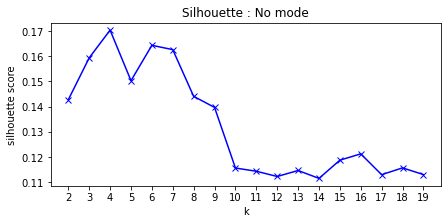

In [52]:
### ---- plot silhouette no mode ------
plt.figure(figsize=(7,3))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette : No mode')
plt.show()

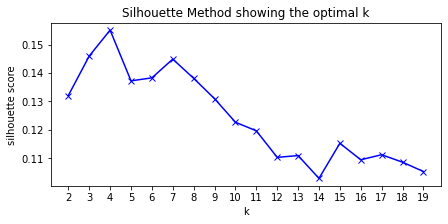

In [26]:
### ---- plot silhouette ------
plt.figure(figsize=(7,3))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')
plt.show()

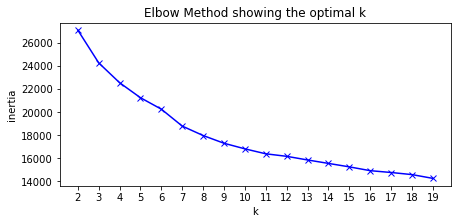

In [27]:
plt.figure(figsize=(7,3))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')
plt.show()

## With all features the best k is 7

try again with different features

In [49]:
## again dropping mode
X = df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
##...go back up and run normalization and main loop 
## NOTE: prev results have been moved to 'all_features' subdir

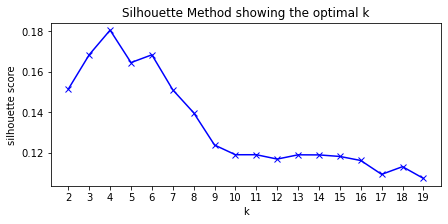

In [33]:
### ---- plot silhouette reduced features------
plt.figure(figsize=(7,3))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')
plt.show()

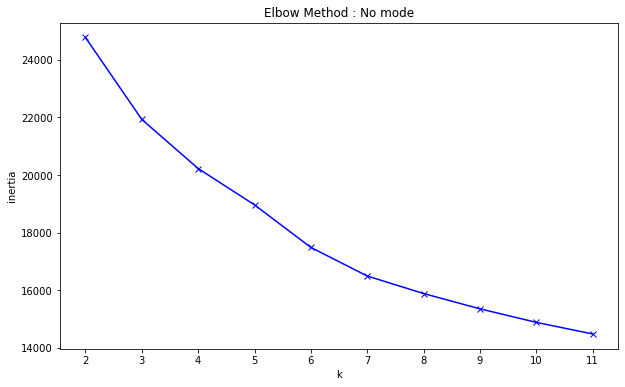

In [54]:
plt.figure(figsize=(10,6))
plt.plot(K[:10], inertia[:10], 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K[:10]), max(K[:10])+1, 1.0))
plt.title('Elbow Method : No mode')
plt.show()

## Load 7 clusters -- all features

In [36]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [55]:
## ------ general outline



kmeans_7_all = load("Model/nina-kmeans_7.pickle")

# add 
track_db['k7_cluster'] = kmeans_7_all.labels_

In [ ]:
## start with a dataframe of audio feature records called 'df'

## create X_scaled_df (the input used for modeling)
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

## load the trained model with the best k
kmeans_7_all = load("Model/nina-kmeans_7.pickle")

# create new col in main df with the cluster label the model assigned to each track
df['k7_cluster'] = kmeans_7_all.labels_

## create dictionary of cluster membership for each label
cluster_labels = np.unique(df.k7_cluster)
cluster_members = {}
for cluster in cluster_labels:
    cluster_members[cluster] = np.where(df.k7_cluster == cluster)

## for each cluster label (ky) calculate the mean for each feature
scaled_feature_means_by_cluster = pd.DataFrame([X_scaled_df.loc[cluster_members[ky]].mean(numeric_only=True) for ky in cluster_members.keys()])

## --- plot results as heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(scaled_feature_means_by_cluster, cmap='coolwarm', vmin=-1, vmax=1, annot=True, square=True)


In [116]:
## Note: I don't need to predict again!! !


In [59]:
# df['k7_cluster'] = kmeans_7_all.predict(X_scaled_df)

In [61]:
track_db = pd.read_csv('Data/db/nina_day4_tracks.csv')

In [117]:
track_db.head(5)

,id,title,artists,pp_artist,k7_cluster
0,5GAB1X0AJq2EZjxXP9zMFt,"Archie, Marry Me",['Alvvays'],Alvvays,4
1,5xo8RrjJ9CVNrtRg2S3B1R,Motion Sickness,['Phoebe Bridgers'],Phoebe Bridgers,1
2,7KdF7Zac5eC9jutk9Qret4,The Wire,['HAIM'],HAIM,6
3,5ftdTvmQjjsL23t7jxADfI,Brazil,['Declan McKenna'],Declan McKenna,6
4,3NRql0A1Ef4RCvT473iqgD,Hell N Back,['Bakar'],Bakar,5


In [63]:
track_db['k7_cluster'] = df['k7_cluster']

In [69]:
## get k7 cluster info
clusters = np.unique(track_db.k7_cluster)
cluster_members = {}
for cluster in clusters:
    cluster_members[cluster] = np.where(track_db.k7_cluster == cluster)


In [60]:
df.k7_cluster.value_counts()

6    657
0    573
1    367
4    307
2    233
5    160
3     80
Name: k7_cluster, dtype: int64

## save clustering info to main tracks DB .csv

In [102]:
full_track_deets = pd.read_csv('Data/db/nina_day4_tracks.csv')


In [103]:
full_track_deets['k7_cluster_label'] = df.k7_cluster

In [106]:
(full_track_deets['id'] == df.id).all()

True

In [107]:
full_track_deets.to_csv('Data/db/nina_day4_labeled_tracks.csv', index=False)

# Investigate cluster features


## Mean feature value by cluster

In [81]:
feature_means_by_cluster = pd.DataFrame([df.loc[cluster_members[ky]].mean(numeric_only=True) for ky in cluster_members.keys()])

In [86]:
pd.options.display.float_format = '{:,.3f}'.format

feature_means_by_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k7_cluster
0,0.718,0.738,5.808,-9.592,0.476,0.054,0.060,0.809,0.112,0.321,123.619,"352,580.775",4.003,0.000
1,0.594,0.440,5.414,-11.421,0.706,0.048,0.515,0.126,0.143,0.457,112.267,"242,196.052",4.014,1.000
2,0.612,0.784,5.498,-7.039,0.648,0.062,0.105,0.159,0.467,0.565,119.095,"253,879.927",4.000,2.000
3,0.506,0.556,5.925,-9.570,0.562,0.052,0.303,0.241,0.166,0.381,127.920,"281,662.475",2.900,3.000
4,0.455,0.762,5.182,-6.888,0.795,0.063,0.077,0.081,0.155,0.494,153.324,"243,768.586",4.007,4.000
5,0.744,0.650,5.275,-7.173,0.537,0.312,0.137,0.036,0.176,0.535,121.962,"207,582.237",4.025,5.000
6,0.698,0.742,5.097,-7.228,0.613,0.056,0.119,0.075,0.127,0.716,115.524,"230,648.951",4.003,6.000


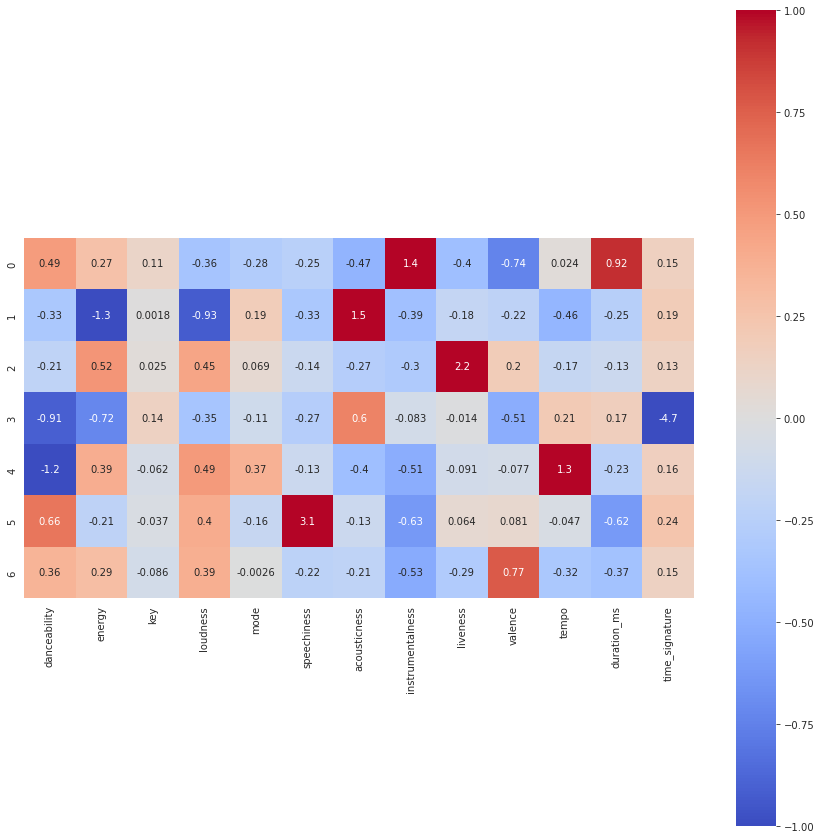

In [94]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(scaled_feature_means_by_cluster,cmap='coolwarm',vmin=-1,vmax=1, annot=True, square=True)

Cluster 0 has high intrumentalness and long duration

Cluster 1 has high accousticness and low energy

Cluster 2 has high liveliness (and time_signature is four-on-the-floor all da time!)

Cluster 3 has low danceability and unusual time signatures!

Cluster 4 has low danceability and high tempo (high mode)

Cluster 5 has high speechiness and short duration

Cluster 6 has high valence

feature 'key' is uninformative

## Mean and std by cluster, normalized features

In [87]:
pd.options.display.float_format = '{:,.3f}'.format
scaled_feature_means_by_cluster = pd.DataFrame([X_scaled_df.loc[cluster_members[ky]].mean(numeric_only=True) for ky in cluster_members.keys()])
scaled_feature_means_by_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.492,0.269,0.111,-0.356,-0.284,-0.246,-0.469,1.441,-0.398,-0.737,0.024,0.917,0.149
1,-0.325,-1.348,0.002,-0.929,0.187,-0.327,1.537,-0.390,-0.178,-0.217,-0.459,-0.251,0.194
2,-0.208,0.519,0.025,0.445,0.069,-0.140,-0.270,-0.302,2.163,0.195,-0.169,-0.128,0.134
3,-0.909,-0.720,0.143,-0.349,-0.107,-0.273,0.602,-0.083,-0.014,-0.508,0.207,0.166,-4.667
4,-1.246,0.394,-0.062,0.492,0.370,-0.126,-0.396,-0.511,-0.091,-0.077,1.288,-0.235,0.162
5,0.662,-0.212,-0.037,0.403,-0.159,3.113,-0.130,-0.631,0.064,0.081,-0.047,-0.618,0.243
6,0.358,0.290,-0.086,0.386,-0.003,-0.220,-0.210,-0.529,-0.292,0.773,-0.321,-0.374,0.147


In [88]:
pd.options.display.float_format = '{:,.3f}'.format
scaled_feature_std_by_cluster = pd.DataFrame([X_scaled_df.loc[cluster_members[ky]].std(numeric_only=True) for ky in cluster_members.keys()])
scaled_feature_std_by_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.613,0.798,1.005,0.736,1.027,0.326,0.481,0.382,0.458,0.866,0.364,1.080,0.258
1,0.903,0.737,0.982,1.018,0.938,0.421,1.088,0.736,0.679,0.908,1.075,0.767,0.507
2,0.878,0.750,0.987,0.843,0.983,0.545,0.704,0.778,1.230,0.908,0.845,0.879,0.000
3,1.204,1.248,0.974,1.325,1.026,0.511,1.379,1.000,0.940,0.802,1.313,1.092,1.915
4,0.789,0.782,0.980,0.791,0.831,0.524,0.542,0.543,0.686,0.845,1.074,0.734,0.352
5,0.951,0.873,1.097,0.837,1.028,1.357,0.767,0.375,0.821,0.736,1.220,0.661,0.684
6,0.732,0.708,0.992,0.817,1.001,0.417,0.610,0.506,0.500,0.726,0.700,0.684,0.241
